In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def format_data(n):
    data = pd.read_csv(str(n)+'_metrics_rapids_18_5_100_50.csv') 
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.resample("1S", on="timestamp").sum()
    data['tvalue'] = data.index
    data['delta'] = (data['tvalue']-data['tvalue'][0])
    data['delta'] =data['delta'].apply(lambda x:int( x.value/ 10**9))
    data.set_index('delta', inplace=True)
    data = data[(data.T != 0).any()]
    data[str(n)+"_time_default_value"]=data["size_batch_training"]
    data[str(n)+"_nb_url_sent"]=data["nb_url_sent"]
    return data[[str(n)+"_nb_url_sent",str(n)+"_time_default_value"]]

In [4]:
data1 = format_data(1)
data3 = format_data(3)
data5 = format_data(5)

df = pd.concat([data1, data3, data5], axis=1)
df["avg_nb_url_sent"]=df[["1_nb_url_sent","3_nb_url_sent","5_nb_url_sent"]].mean(axis=1)
df.drop(["1_nb_url_sent","3_nb_url_sent","5_nb_url_sent"], axis=1, inplace=True)
df.head()

,1_time_default_value,3_time_default_value,5_time_default_value,avg_nb_url_sent
delta,,,,
0,817.0,0.0,1036.0,1223.666667
1,2951.0,1921.0,3488.0,3980.666667
2,2781.0,2693.0,3377.0,4337.333333
3,2834.0,3339.0,3384.0,4662.000000
4,2860.0,3936.0,3367.0,4910.333333


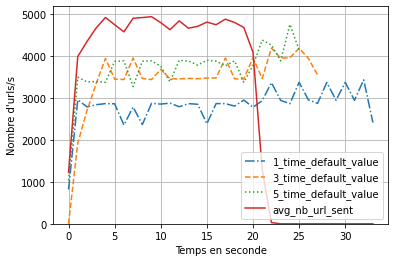

In [5]:
styles = ['-.','--',':',"-"]

df.plot(style=styles)
plt.xlabel("Temps en seconde")
plt.ylabel("Nombre d'urls/s")
plt.grid(True, which="major", ls="-")
plt.ylim(bottom=0)
# start avec y=0
plt.savefig('test_batch_mem_size.svg') 

In [6]:
data = pd.read_csv('metrics_rapids_18_5_250_50.csv') 
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.resample("1S", on="timestamp").sum()
data['tvalue'] = data.index
data['delta'] = (data['tvalue']-data['tvalue'][0])
data['delta'] =data['delta'].apply(lambda x:int( x.value/ 10**9))
data.set_index('delta', inplace=True)
data = data[(data.T != 0).any()]


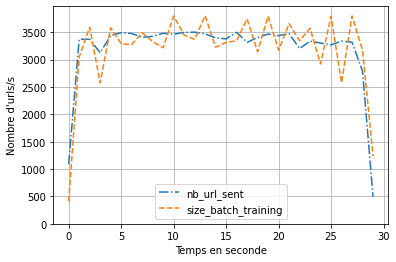

In [7]:
df= data[["nb_url_sent","size_batch_training"]]
styles = ['-.','--',':',"-"]

df.plot(style=styles)
plt.xlabel("Temps en seconde")
plt.ylabel("Nombre d'urls/s")
plt.grid(True, which="major", ls="-")
plt.ylim(bottom=0)
# start avec y=0
plt.savefig('test_interval_250.svg') 